## Setup

Simple function to generate random names (feel free to ignore this cell):

In [6]:
import requests
import string
import random

lorem = requests.get('http://loripsum.net/api/plaintext').text
WORDS = [word.lower() 
         for word in filter(lambda c: c not in string.punctuation, lorem).split()]

def random_words(n=2):
    return '_'.join(random.choice(WORDS) for i in range(n))

# Using Provenance in Adama

> The following disables the warnings from the `requests` library about SSL certificates.  **Do not** do this in production.

In [3]:
import requests
requests.packages.urllib3.disable_warnings()

Connect the `adama` Python object to your API server of choice.  The official one is `https://api.araport.org/community/v0.3`.  The parameter `verify` indicates whether to check SSL certificates.

In [4]:
import adamalib
reload(adamalib.adamalib)

API = 'https://adama-dev.cloudapp.net/community/v0.3'
TOKEN = 'mytoken'

adama = adamalib.Adama(API, token=TOKEN, verify=False)

Create a random namespace:

In [7]:
namespace = adama.namespaces.add(name=random_words())
namespace

Namespace(intellegunt_studio)

Add the service `prov`, already included in this notebook:

In [4]:
import provn.main
service = namespace.services.add(provn.main)
service

Service(/quod_non/prov_v0.1)

If you are interested in checking out the metadata file of this service, evaluate the next cell:

In [ ]:
!cat provn/metadata.yml

Do a simple search and save the result:

In [5]:
result = service.search()
result

[{u'name': u'no name given'}, {u'localtime': u'2015-04-30 16:44:10.099524'}]

`result` can be treated as a standard Python list (it is actually a subclass of `list`).  An additional method `.prov` returns the provenance of the response.  It is equivalent to inspecting the headers of the HTTP response and following the link to the provenance object.

We can ask the provenance of the result in several formats with the following.  By default, the format is a serialized JSON object representing the PROV object:

In [ ]:
result.prov()

The format `prov` returns the PROV object as a native Python object, that can be manipulated according to the [prov library](http://prov.readthedocs.org/en/latest/) (already included in this notebook/container):

In [11]:
result.prov(format='prov')

<ProvDocument>

If this is being evaluated in an IPython notebook, requesting the `png` format should display the image of the provenance graph (double-click on the image to see at full resolution).  The image can also be saved to a file by passing an extra argument: `filename="image.png"`.

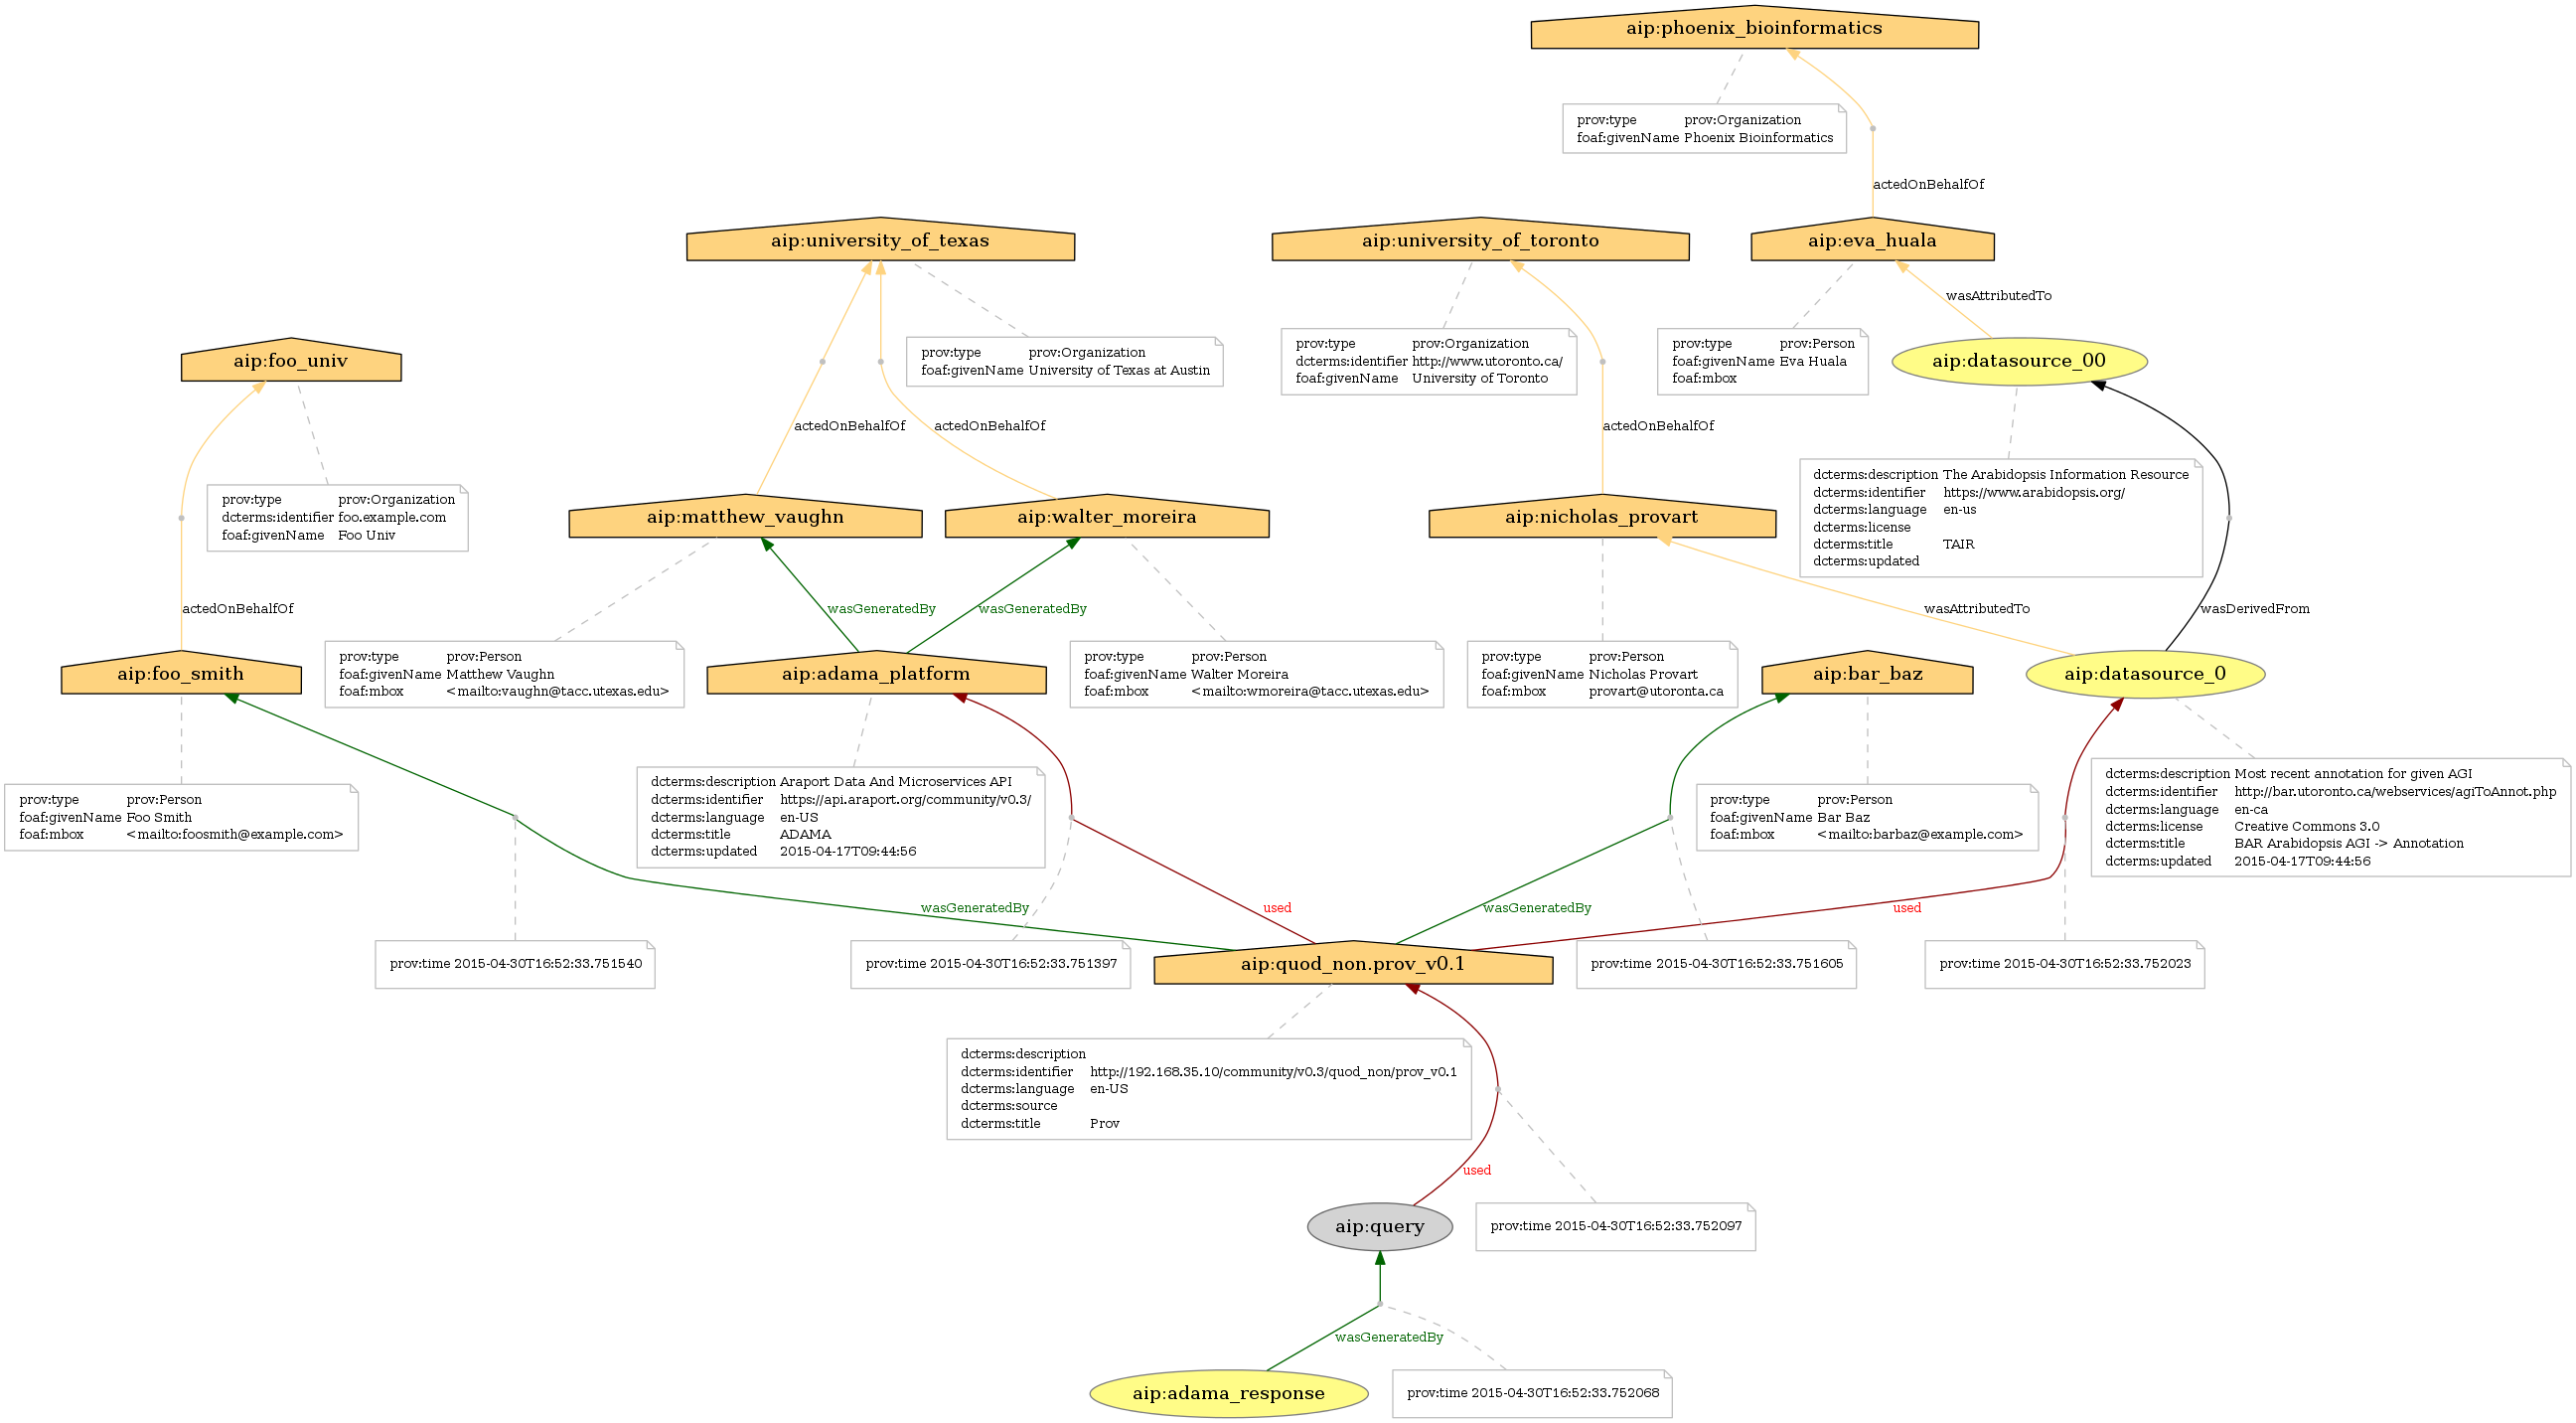

In [14]:
result.prov(format='png')